# Whats the weather like? 

As you get closer to the equator, we know that it gets hotter. Here is some data to prove the same by utilizing the simple Python library, the OpenWeatherMap API.

#### Import Dependencies

In [76]:
import requests
from pprint import pprint
from citipy import citipy
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
import numpy as np
import os
from scipy.stats import linregress

# config file with API key
from config import api_key

#### Save config information.

In [2]:
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&q="

#### Range of latitudes and longitudes

In [3]:
lat_range = (-90, 90)
lng_range = (-180, 180)

#### set up lists to hold reponse info

In [4]:
lat_lng = []
cities = []
countries = []

##### Create a set of random latitutude and longitude combinations

In [5]:
lat = np.random.uniform(low=-90.000, high=90.000, size=1500)
lng = np.random.uniform(low=-180.000, high=180.00, size=1500)
lat_lng = zip(lat, lng)

##### Identify nearest city for each latitude, longitude combination

In [6]:
for lat_lng in lat_lng:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    
    if city not in cities:
        cities.append(city)
        countries.append(country.upper())

##### Print the city count

In [7]:
print(len(cities))

596


##### Print the country count

In [8]:
print(len(countries))

596


In [9]:
#Create a dataframe to store the data
weather_data = pd.DataFrame({'City': cities, 'Country': countries, 'Cloudiness': "", 'Humidity': "", 'Latitude': "", 'Longitude': "", 'Max Temp': "", 'Windspeed': ""})

#Preview the dataframe
weather_data.head()


,City,Country,Cloudiness,Humidity,Latitude,Longitude,Max Temp,Windspeed
0,taolanaro,MG,,,,,,
1,matagami,CA,,,,,,
2,alice springs,AU,,,,,,
3,caravelas,BR,,,,,,
4,east london,ZA,,,,,,


##### Variables to keep track of response number

In [10]:
count_num = 1
count_set = 1

##### Perform API call 

In [11]:
print("Begin API Call to OpenWeather Database ")
print("---------------------------------------")

for index, row in weather_data.iterrows(): 
    #Create the query url for the API call
    query_url = url + row['City'] + ',' + row['Country'] + '&APPID=' + api_key
    


#API call
    response = requests.get(query_url).json()

        #Exception script in case the city is not found by the API call
    try: 
            #Message to alert the user that the data is being retrieved
        print(f'Processing Weather Data for Record {count_num} for the city {response["name"]}')

            #Input data into the dataframe
        weather_data.loc[index, 'Cloudiness'] = response['clouds']['all']
            #city_weather.loc[index, 'Date'] = response['dt']
        weather_data.loc[index, 'Humidity'] = response['main']['humidity']
        weather_data.loc[index, 'Latitude'] = response['coord']['lat']
        weather_data.loc[index, 'Longitude'] = response['coord']['lon']
        weather_data.loc[index, 'Max Temp'] = response['main']['temp_max']
        weather_data.loc[index, 'Windspeed'] = response['wind']['speed']

            #Increase the record count
        count_num += 1

    except (KeyError, IndexError):
            print("City not found....Skipping............")

        #If statement to handle the API call limits
   # if count_num == 51:
   #     count_set += 1
   #     count_num = 1
        

print("---------------------------------------")
print("Processing Complete")
  

Begin API Call to OpenWeather Database 
---------------------------------------
City not found....Skipping............
Processing Weather Data for Record 1 for the city Matagami
Processing Weather Data for Record 2 for the city Alice Springs
Processing Weather Data for Record 3 for the city Caravelas
Processing Weather Data for Record 4 for the city East London
Processing Weather Data for Record 5 for the city Bambous Virieux
City not found....Skipping............
Processing Weather Data for Record 6 for the city Kumul
Processing Weather Data for Record 7 for the city Tuktoyaktuk
Processing Weather Data for Record 8 for the city Arraial do Cabo
Processing Weather Data for Record 9 for the city Listvyanskiy
Processing Weather Data for Record 10 for the city Hermanus
Processing Weather Data for Record 11 for the city East Valencia
Processing Weather Data for Record 12 for the city Kazachinskoye
Processing Weather Data for Record 13 for the city Olafsvik
Processing Weather Data for Record

Processing Weather Data for Record 128 for the city Pevek
Processing Weather Data for Record 129 for the city Tura
Processing Weather Data for Record 130 for the city Deputatsky
Processing Weather Data for Record 131 for the city Fukuechō
Processing Weather Data for Record 132 for the city Timizart
Processing Weather Data for Record 133 for the city Eureka
Processing Weather Data for Record 134 for the city Il’inskiy
Processing Weather Data for Record 135 for the city Longyearbyen
Processing Weather Data for Record 136 for the city Laguna
Processing Weather Data for Record 137 for the city Jurm
Processing Weather Data for Record 138 for the city Maceió
Processing Weather Data for Record 139 for the city Mahajanga
Processing Weather Data for Record 140 for the city Mount Gambier
Processing Weather Data for Record 141 for the city Haukipudas
Processing Weather Data for Record 142 for the city Coquimbo
Processing Weather Data for Record 143 for the city Saskylakh
Processing Weather Data f

Processing Weather Data for Record 253 for the city Freeport
Processing Weather Data for Record 254 for the city Labuhan
Processing Weather Data for Record 255 for the city Sinnamary
Processing Weather Data for Record 256 for the city Esperance
Processing Weather Data for Record 257 for the city Bethel
Processing Weather Data for Record 258 for the city Sand Springs
Processing Weather Data for Record 259 for the city Dargaville
Processing Weather Data for Record 260 for the city Kaitangata
Processing Weather Data for Record 261 for the city High Level
Processing Weather Data for Record 262 for the city Kutum
City not found....Skipping............
Processing Weather Data for Record 263 for the city Xining
Processing Weather Data for Record 264 for the city Faranah
Processing Weather Data for Record 265 for the city Noumea
Processing Weather Data for Record 266 for the city Paciran
Processing Weather Data for Record 267 for the city Port-Gentil
Processing Weather Data for Record 268 for 

Processing Weather Data for Record 378 for the city Kadaya
Processing Weather Data for Record 379 for the city General Roca
Processing Weather Data for Record 380 for the city Iquitos
Processing Weather Data for Record 381 for the city Mandalgovi
Processing Weather Data for Record 382 for the city Vila Velha
Processing Weather Data for Record 383 for the city Skellefteå
City not found....Skipping............
Processing Weather Data for Record 384 for the city Paidha
City not found....Skipping............
City not found....Skipping............
Processing Weather Data for Record 385 for the city Somerville
Processing Weather Data for Record 386 for the city Lira
Processing Weather Data for Record 387 for the city Gushikawa
Processing Weather Data for Record 388 for the city Anadyr
Processing Weather Data for Record 389 for the city Srednekolymsk
City not found....Skipping............
Processing Weather Data for Record 390 for the city Kununurra
Processing Weather Data for Record 391 for 

Processing Weather Data for Record 500 for the city Neuquén
Processing Weather Data for Record 501 for the city Husavik
Processing Weather Data for Record 502 for the city Marystown
Processing Weather Data for Record 503 for the city Nhulunbuy
Processing Weather Data for Record 504 for the city Esna
Processing Weather Data for Record 505 for the city Linxia Chengguanzhen
Processing Weather Data for Record 506 for the city Svetlogorsk
City not found....Skipping............
Processing Weather Data for Record 507 for the city Dakar
City not found....Skipping............
Processing Weather Data for Record 508 for the city Mumford
Processing Weather Data for Record 509 for the city Zhangye
Processing Weather Data for Record 510 for the city Popondetta
Processing Weather Data for Record 511 for the city Mae Ramat
Processing Weather Data for Record 512 for the city Hyderabad
Processing Weather Data for Record 513 for the city Mafinga
City not found....Skipping............
City not found....Sk

##### Clean dataframe to remove cities that were not found

In [12]:
weather_data['Max Temp'] = weather_data['Max Temp'].replace('', np.nan)
weather_data = weather_data.dropna()

##### Save the dataframe

In [13]:
weather_data.to_csv("Output/CityWeatherData.csv", index=False, header=True)

##### Preview the dataframe

In [14]:
weather_data.head()

,City,Country,Cloudiness,Humidity,Latitude,Longitude,Max Temp,Windspeed
1,matagami,CA,1,71,49.75,-77.63,50.00,11.41
2,alice springs,AU,90,27,-23.7,133.88,73.40,6.93
3,caravelas,BR,29,62,-17.71,-39.25,81.59,10.18
4,east london,ZA,20,72,-33.02,27.91,59.00,9.17
5,bambous virieux,MU,75,77,-20.34,57.76,66.99,12.75


### Plotting scatter plots
##### Max Temp vs Latitude

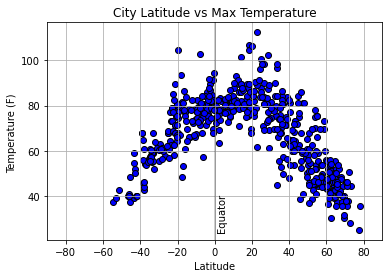

In [35]:
plt.scatter(weather_data["Latitude"], weather_data["Max Temp"], facecolors="blue", edgecolors="black", marker="o")

# Add chart labels
plt.title("City Latitude vs Max Temperature")
plt.axvline(0, color = 'black', alpha = .25, label = 'Equator')
plt.text(1,25,'Equator',rotation=90)
plt.ylabel("Temperature (F) ")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

plt.savefig("Output/City Latitude vs. Max Temperature.png")

# Show plot
plt.show()

#### Analysis of Latitude vs Temperature
Temperature seems to have a clear co - relation with the equator. Closer to the equator, you can see that the temperature has become significantly warmer. The southern hemisphere seems to be much warmer than the northern hemisphere during this time. 

##### Humidity Vs Latitude

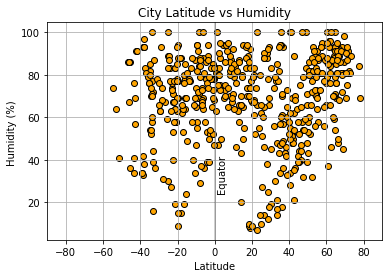

In [34]:
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], facecolors="orange", edgecolors="black", marker="o")

# Add chart labels
plt.title("City Latitude vs Humidity")
plt.axvline(0, color = 'black', alpha = .25, label = 'Equator')
plt.text(1,25,'Equator',rotation=90)
plt.ylabel("Humidity (%) ")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

plt.savefig("Output/City Latitude vs. Humidity.png")

# Show plot
plt.show()

#### Analysis of Latitude vs Humidity
There seems to be rather high humidity(60% to 100%) between -40 and 80 deg latitude. 


##### Cloudiness Vs Latitude

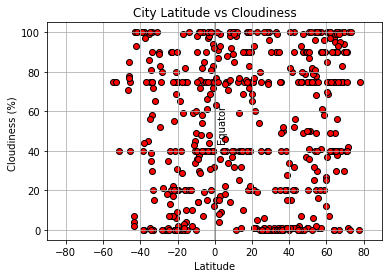

In [33]:
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], facecolors="red", edgecolors="black", marker="o")

# Add chart labels
plt.title("City Latitude vs Cloudiness")
plt.axvline(0, color = 'black', alpha = .30, label = 'Equator')
plt.text(1,45,'Equator',rotation=90)
plt.ylabel("Cloudiness (%) ")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

plt.savefig("Output/City Latitude vs. Cloudiness.png")

# Show plot
plt.show()

#### Analysis of Latitude vs Cloudiness
There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities near 0, 40, 80, and 100% cloudiness

##### Windspeed Vs Latitude

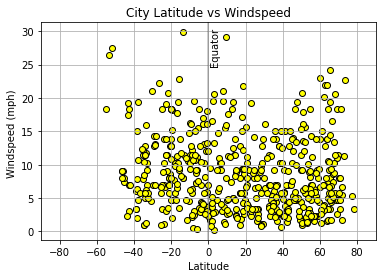

In [29]:
plt.scatter(weather_data["Latitude"], weather_data["Windspeed"], facecolors="Yellow", edgecolors="black", marker="o")

# Add chart labels
plt.title("City Latitude vs Windspeed")
plt.axvline(0, color = 'black', alpha = .25, label = 'Equator')
plt.text(1,25,'Equator',rotation=90)
plt.ylabel("Windspeed (mph) ")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

plt.savefig("Output/City Latitude vs. Windspeed.png")

# Show plot
plt.show()

#### Analysis of Latitude vs Windspeed
There is no strong relationship between latitude and wind speed. However, the cities with wind speeds over 15 mph increase when you move either direction away from the equator.
Wind speed tends to generally be betweeen 0 and 15 mph regardless of latitude

#### Create Northern and Southern Hemisphere DataFrames

In [39]:
northern_df = weather_data.loc[pd.to_numeric(weather_data["Latitude"]) > 0, :]
southern_df = weather_data.loc[pd.to_numeric(weather_data["Latitude"]) < 0, :]

### Linear regression
##### Northern Hemisphere: latitude Vs Max Temperature 

Regression line equation is: y = -0.69x + 93.01
The r-squared is: -0.8041028062627509


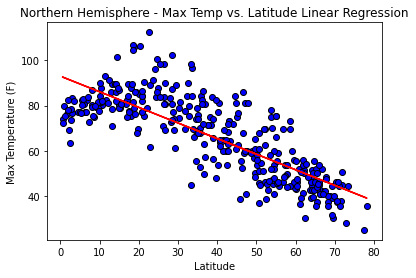

In [68]:
x_values = pd.to_numeric(northern_df['Latitude'])
y_values = pd.to_numeric(northern_df['Max Temp'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values, facecolors="Blue", edgecolors="black", marker="o")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.savefig("Output/Northern Hemisphere Latitude vs. Max Temp.png")
plt.show()

##### Southern Hemisphere: Latitude Vs Max Temperature 

Regression line equation is: y = 0.79x + 84.97
The r-squared is: 0.80721595275594


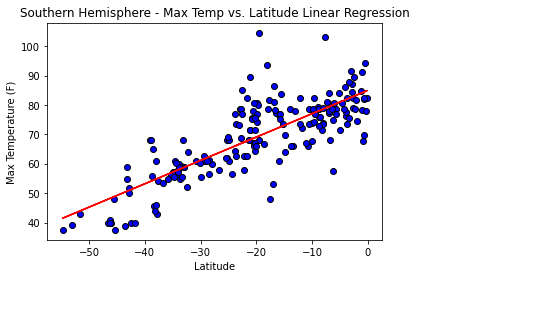

In [69]:
x_values = pd.to_numeric(southern_df['Latitude'])
y_values = pd.to_numeric(southern_df['Max Temp'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values, facecolors="Blue", edgecolors="black", marker="o")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.savefig("Output/Southern Hemisphere Latitude vs. Max Temp.png")
plt.show()

#### Analysis of Linear regression of Nothern and Southern Hemisphere for Max temp vs Latitude
The regression shows a positive corelation for Southern hemisphere & negative Northern hemisphere. 
In the nothern hemisphere, as you move away from the equator the temperature decreases and the southern hemisphere, as you get closer to the equator the temperature increases.

##### Northern Hemisphere: latitude Vs Humidity (%) 

Regression line equation is: y = 0.15x + 64.04
The r-squared is: 0.1427120511182019


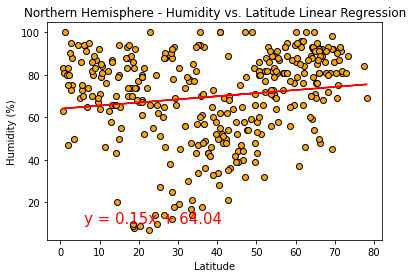

In [70]:
x_values = pd.to_numeric(northern_df['Latitude'])
y_values = pd.to_numeric(northern_df['Humidity'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values, facecolors="Orange", edgecolors="black", marker="o")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.savefig("Output/Northern Hemisphere Latitude vs. Humidity.png")
plt.show()

##### Southern Hemisphere: Humidity (%)  vs Latitude

Regression line equation is: y = 0.1x + 70.15
The r-squared is: 0.0679568392728301


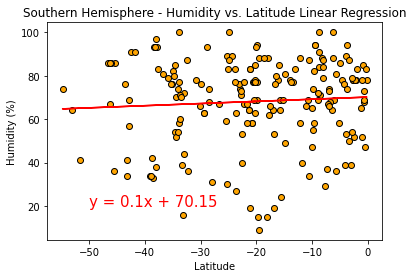

In [71]:
x_values = pd.to_numeric(southern_df['Latitude'])
y_values = pd.to_numeric(southern_df['Humidity'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values, facecolors="Orange", edgecolors="black", marker="o")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.savefig("Output/Southern Hemisphere Latitude vs. Humidity.png")
plt.show()

#### Analysis of Linear regression of Nothern and Southern Hemisphere for Humidity vs Latitude
The regression does not show much corelation between the data sets

##### Northern Hemisphere: latitude Vs Cloudiness (%) 

Regression line equation is: y = 0.16x + 44.39
The r-squared is: 0.08879616286831281


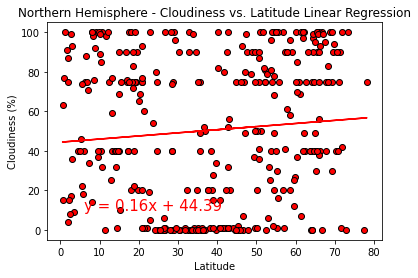

In [72]:
x_values = pd.to_numeric(northern_df['Latitude'])
y_values = pd.to_numeric(northern_df['Cloudiness'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values, facecolors="Red", edgecolors="black", marker="o")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.savefig("Output/Northern Hemisphere Latitude vs. Cloudiness.png")
plt.show()

##### Southern Hemisphere: latitude Vs Cloudiness (%) 

Regression line equation is: y = -0.06x + 49.22
The r-squared is: -0.025249707459027323


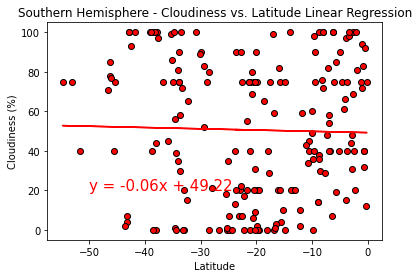

In [73]:
x_values = pd.to_numeric(southern_df['Latitude'])
y_values = pd.to_numeric(southern_df['Cloudiness'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values, facecolors="Red", edgecolors="black", marker="o")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.savefig("Output/Southern Hemisphere Latitude vs. Cloudiness.png")
plt.show()

#### Analysis of Linear regression of Nothern and Southern Hemisphere for Cloudiness vs Latitude
The regression does not show much corelation between the data sets


##### Northern Hemisphere: latitude Vs Windspeed (mph) 

Regression line equation is: y = 0.01x + 7.57
The r-squared is: 0.024008592871721683


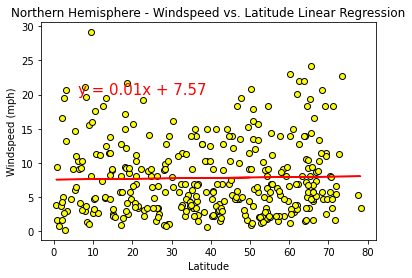

In [74]:
x_values = pd.to_numeric(northern_df['Latitude'])
y_values = pd.to_numeric(northern_df['Windspeed'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values, facecolors="Yellow", edgecolors="black", marker="o")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
plt.title('Northern Hemisphere - Windspeed vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.savefig("Output/Northern Hemisphere Latitude vs. Windspeed.png")
plt.show()

##### Southern Hemisphere: latitude Vs Windspeed (mph) 

Regression line equation is: y = -0.04x + 8.76
The r-squared is: -0.10558970595661175


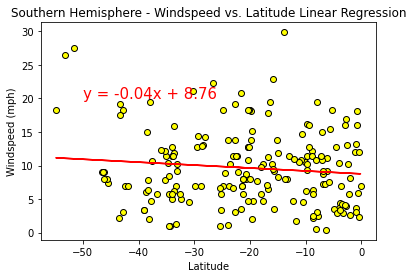

In [75]:
x_values = pd.to_numeric(southern_df['Latitude'])
y_values = pd.to_numeric(southern_df['Windspeed'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values, facecolors="Yellow", edgecolors="black", marker="o")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
plt.title('Southern Hemisphere - Windspeed vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.savefig("Output/Southern Hemisphere Latitude vs. Windspeed.png")
plt.show()

#### Analysis of Linear regression of Nothern and Southern Hemisphere for Windspeed vs Latitude
The regression does not display much of a correlation between the data sets.